In [1]:
import pandas as pd
import numpy as np

Cleaning the csv file such that the final columns are the CHEMBL ID, SMILES, and the pChembl (-log IC50). We want to remove duplicates, each molecule must have SMILES strings, pChembl (-log IC50), and also remove outliers (that is, molecules with -log IC50 <2 or >12 because those likely have poor bioactivity).

In [3]:
#import the csv file, making a copy of it
compounds = pd.read_csv("TRPM8-homosapien-compounds-activities-processed.csv").copy()

#look at the format of the first few rows
compounds.head(5)

,Molecule ChEMBL ID,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Value,Standard Units,pChEMBL Value,...,Action Type,InChI,Potency,Molecular Weight_standardized,AlogP_standardized,Standard Value_standardized,pChEMBL Value_standardized,Ligand Efficiency LE_standardized,Ligand Efficiency LLE_standardized,Ligand Efficiency SEI_standardized
0,CHEMBL3235962,421.42,1.0,5.76,22,N#Cc1cccc(NC(=O)N2CCc3ccccc3[C@H]2c2ccc(C(F)(F...,IC50,83.000,nM,7.08,...,NaN,"InChI=1S/C24H18F3N3O/c25-24(26,27)19-10-8-18(9...",High Potency \r\n(less than 1 $\mu$M),-0.309321,0.767358,-0.364079,0.101789,-0.048144,-0.565826,0.681188
1,CHEMBL3235983,434.36,1.0,5.45,44,C[C@H](NC(=O)N1CCc2ccccc2[C@H]1c1ccc(C(F)(F)F)...,IC50,10.000,nM,8.00,...,NaN,"InChI=1S/C20H17F7N2O/c1-11(19(22,23)24)28-18(3...",High Potency \r\n(less than 1 $\mu$M),-0.172629,0.532451,-0.368572,0.899639,0.703022,0.525241,3.859073
2,CHEMBL1650511,467.41,1.0,7.09,5,FC(F)(F)c1ccccc1-c1cc(C(F)(F)F)c2[nH]c(C3=NOC4...,IC50,0.413,nM,9.38,...,NaN,"InChI=1S/C23H19F6N3O/c24-22(25,26)15-7-3-2-6-1...",High Potency \r\n(less than 1 $\mu$M),0.176496,1.775186,-0.369162,2.096415,1.153721,0.294609,2.267508
3,CHEMBL2443068,438.83,1.0,5.39,9b,O=C1CC2(CCN(C(=O)Nc3ccc(C(F)(F)F)cc3)CC2)Oc2c(...,IC50,230.400,nM,6.64,...,NaN,InChI=1S/C21H18ClF3N2O3/c22-16-3-1-2-15-17(28)...,High Potency \r\n(less than 1 $\mu$M),-0.125410,0.486986,-0.355008,-0.279792,-0.198377,-0.627919,0.340326
4,CHEMBL3959823,358.44,0.0,3.86,9n,Cc1cccc(CN(C(=O)c2ccccc2)[C@@H](C(N)=O)c2ccccc...,IC50,870.000,nM,6.06,...,NaN,InChI=1S/C23H22N2O2/c1-17-9-8-10-18(15-17)16-2...,High Potency \r\n(less than 1 $\mu$M),-0.974612,-0.672395,-0.315645,-0.782785,-0.048144,0.214775,-0.121149


In [4]:
#get the columns we want
columns_to_keep = ['Molecule ChEMBL ID', 'Smiles', 'pChEMBL Value']
df = pd.DataFrame(compounds)[columns_to_keep]
df

,Molecule ChEMBL ID,Smiles,pChEMBL Value
0,CHEMBL3235962,N#Cc1cccc(NC(=O)N2CCc3ccccc3[C@H]2c2ccc(C(F)(F...,7.08
1,CHEMBL3235983,C[C@H](NC(=O)N1CCc2ccccc2[C@H]1c1ccc(C(F)(F)F)...,8.00
2,CHEMBL1650511,FC(F)(F)c1ccccc1-c1cc(C(F)(F)F)c2[nH]c(C3=NOC4...,9.38
3,CHEMBL2443068,O=C1CC2(CCN(C(=O)Nc3ccc(C(F)(F)F)cc3)CC2)Oc2c(...,6.64
4,CHEMBL3959823,Cc1cccc(CN(C(=O)c2ccccc2)[C@@H](C(N)=O)c2ccccc...,6.06
...,...,...,...
649,CHEMBL207433,O=C(Nc1ccccc1Br)N[C@@H]1CCN(c2ccc(C(F)(F)F)cn2)C1,5.80
650,CHEMBL1377190,CCOC(=O)c1sc(-c2ccc(Cl)cc2)nc1O,6.26
651,CHEMBL5275535,CCn1nnc(-c2sc(-c3cnccn3)nc2O)n1,5.72
652,CHEMBL5269450,CC(C)CC(=O)c1sc(-c2cccc(F)c2)nc1O,6.54


In [5]:
#drop duplicates, rows that have NAN values 
df_cleaned = df.drop_duplicates().dropna()
df_cleaned

,Molecule ChEMBL ID,Smiles,pChEMBL Value
0,CHEMBL3235962,N#Cc1cccc(NC(=O)N2CCc3ccccc3[C@H]2c2ccc(C(F)(F...,7.08
1,CHEMBL3235983,C[C@H](NC(=O)N1CCc2ccccc2[C@H]1c1ccc(C(F)(F)F)...,8.00
2,CHEMBL1650511,FC(F)(F)c1ccccc1-c1cc(C(F)(F)F)c2[nH]c(C3=NOC4...,9.38
3,CHEMBL2443068,O=C1CC2(CCN(C(=O)Nc3ccc(C(F)(F)F)cc3)CC2)Oc2c(...,6.64
4,CHEMBL3959823,Cc1cccc(CN(C(=O)c2ccccc2)[C@@H](C(N)=O)c2ccccc...,6.06
...,...,...,...
649,CHEMBL207433,O=C(Nc1ccccc1Br)N[C@@H]1CCN(c2ccc(C(F)(F)F)cn2)C1,5.80
650,CHEMBL1377190,CCOC(=O)c1sc(-c2ccc(Cl)cc2)nc1O,6.26
651,CHEMBL5275535,CCn1nnc(-c2sc(-c3cnccn3)nc2O)n1,5.72
652,CHEMBL5269450,CC(C)CC(=O)c1sc(-c2cccc(F)c2)nc1O,6.54


In [10]:
#delete rows with pChEMBL Values outside of threshold (<2 and >12)
df_filtered = df_cleaned.drop(df_cleaned[(df_cleaned['pChEMBL Value'] < 2) & (df_cleaned['pChEMBL Value'] > 12)].index)
df_filtered

,Molecule ChEMBL ID,Smiles,pChEMBL Value
0,CHEMBL3235962,N#Cc1cccc(NC(=O)N2CCc3ccccc3[C@H]2c2ccc(C(F)(F...,7.08
1,CHEMBL3235983,C[C@H](NC(=O)N1CCc2ccccc2[C@H]1c1ccc(C(F)(F)F)...,8.00
2,CHEMBL1650511,FC(F)(F)c1ccccc1-c1cc(C(F)(F)F)c2[nH]c(C3=NOC4...,9.38
3,CHEMBL2443068,O=C1CC2(CCN(C(=O)Nc3ccc(C(F)(F)F)cc3)CC2)Oc2c(...,6.64
4,CHEMBL3959823,Cc1cccc(CN(C(=O)c2ccccc2)[C@@H](C(N)=O)c2ccccc...,6.06
...,...,...,...
649,CHEMBL207433,O=C(Nc1ccccc1Br)N[C@@H]1CCN(c2ccc(C(F)(F)F)cn2)C1,5.80
650,CHEMBL1377190,CCOC(=O)c1sc(-c2ccc(Cl)cc2)nc1O,6.26
651,CHEMBL5275535,CCn1nnc(-c2sc(-c3cnccn3)nc2O)n1,5.72
652,CHEMBL5269450,CC(C)CC(=O)c1sc(-c2cccc(F)c2)nc1O,6.54


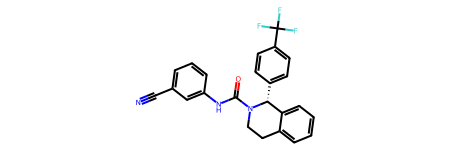

,Molecule ChEMBL ID,Smiles,pChEMBL Value
0,CHEMBL3235962,N#Cc1cccc(NC(=O)N2CCc3ccccc3[C@H]2c2ccc(C(F)(F...,7.08
1,CHEMBL3235983,C[C@H](NC(=O)N1CCc2ccccc2[C@H]1c1ccc(C(F)(F)F)...,8.00
2,CHEMBL1650511,FC(F)(F)c1ccccc1-c1cc(C(F)(F)F)c2[nH]c(C3=NOC4...,9.38
3,CHEMBL2443068,O=C1CC2(CCN(C(=O)Nc3ccc(C(F)(F)F)cc3)CC2)Oc2c(...,6.64
4,CHEMBL3959823,Cc1cccc(CN(C(=O)c2ccccc2)[C@@H](C(N)=O)c2ccccc...,6.06
...,...,...,...
649,CHEMBL207433,O=C(Nc1ccccc1Br)N[C@@H]1CCN(c2ccc(C(F)(F)F)cn2)C1,5.80
650,CHEMBL1377190,CCOC(=O)c1sc(-c2ccc(Cl)cc2)nc1O,6.26
651,CHEMBL5275535,CCn1nnc(-c2sc(-c3cnccn3)nc2O)n1,5.72
652,CHEMBL5269450,CC(C)CC(=O)c1sc(-c2cccc(F)c2)nc1O,6.54


In [34]:
#validate that SMILES is correct using RDKit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG=True

#function to try creating molecules from SMILES
def validate_smiles(smiles):
    try:  # Try converting the SMILES to mol object
        mol = Chem.MolFromSmiles(smiles) 
    except:  #print the SMILES if there was an error in converting
        print(smiles)
        return None 
    
#test to validate the first smiles string and draw it
mol = Chem.MolFromSmiles(df_filtered['Smiles'][0])
display(mol)

for index, row in df_filtered.iterrows():
    if validate_smiles(row['Smiles']) == None: 
        df_filtered.drop(index)

df_filtered